# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [8]:
import sys
sys.path
sys.path.insert(0,'C:\\Users\\Jacob\\Documents\\GitHub\\lenskit_confidence')

In [9]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als, item_knn
from lenskit.datasets import MovieLens
from lenskit import topn, util
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [10]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [11]:
util.log_to_notebook()

[   INFO] lenskit.util.log log already initialized
[   INFO] lenskit.util.log notebook logging configured
[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [12]:
mlsmall = MovieLens('../data/ml-latest-small')
#mlsmall = MovieLens('../data/ml-1m')
#mlsmall = MovieLens('../data/ml-20m')


## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [28]:
eval = MultiEval('my-eval', recommend=20)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [29]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
eval.add_datasets(pairs, name='ML-Small')

[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 3: selecting test ratings
[   INFO] lenskit.crossfold fold 3: sel

We're going to test explicit MF with several neighborhood sizes:

In [30]:
eval.add_algorithms([als.BiasedMF(f) for f in [15, 30, 50, 100]], attrs=['features'], name='BiasedMF')

And implicit MF:

In [31]:
eval.add_algorithms([als.ImplicitMF(f) for f in [15, 30, 50, 100]], attrs=['features'], name='ImplicitMF')

And add a popular baseline for comparison:

In [ ]:
eval.add_algorithms(basic.Popular(), name='Pop')

And finally, we will run the experiment!

In [32]:
eval.run(progress=tqdm)

[   INFO] lenskit.batch._multi starting run 1: als.BiasedMF(features=15, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 1: als.BiasedMF(features=15, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=15, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=15, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=15, regularization=0.1) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=15, regularization=0.1) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.als [ 3ms] fitting bias model
[   INFO] lenskit.algorithms.bias building bias model for 99329 ratings
[   INFO] lenskit.algorithms.bias building bias model for 99329 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias g

[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 135 users in 6.23s
[   INFO] lenskit.batch._recommend recommended for 135 users in 6.24s
[   INFO] lenskit.batch._multi generated recommendations in 6.69s
[   INFO] lenskit.batch._multi generated recommendations in 6.69s
[   INFO] lenskit.batch._multi run 1: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi run 1: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 1: als.BiasedMF(features=15, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi finished run 1: als.BiasedMF(features=15, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 2: als.BiasedMF(features=30, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 2: als.BiasedMF(features=30, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=30,

[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=30, regularization=0.1) to 1835 pickle bytes with 14 buffers of 3124964 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=30, regularization=0.1) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=30, regularization=0.1) for 135 users (n_jobs=None)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 135 users in 6.32s
[   INFO] lenskit.batch._recommend recommended for 135 users in 6.32s
[   INFO] lenskit.batch._multi generated recommendations in 6.84s
[   

[   INFO] lenskit.batch._multi generated predictions in 5.90s
[   INFO] lenskit.batch._multi generated predictions in 5.90s
[   INFO] lenskit.batch._multi run 3: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 3: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=50, regularization=0.1) to 1835 pickle bytes with 14 buffers of 4682084 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=50, regularization=0.1) to 1835 pickle bytes with 14 buffers of 4682084 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO

[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  22ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  24ms)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.42s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.42s
[   INFO] lenskit.batch._multi generated predictions in 5.88s
[   INFO] lenskit.batch._multi generated predictions in 5.88s
[   INFO] lenskit.batch._multi run 4: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 4: writing results to my-e

[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=15, reg=0.1, w=40) to 1242 pickle bytes with 9 buffers of 1725356 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  17ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  19ms)
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.08s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.08s
[   INFO] lenskit.batch._multi generated predictions in 5.62s
[   INFO] lenskit.batch._multi generated predictions in 5.62s
[   INFO] lenskit.batch._multi run 5: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 5: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 

[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  15ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  16ms)
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.13s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.13s
[   INFO] lenskit.batch._multi generated predictions in 5.67s
[   INFO] lenskit.batch._multi generated predictions in 5.67s
[   INFO] lenskit.batch._multi run 6: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 6: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=30, reg=0.1, w=40)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=30, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=30, reg=0.1, w=40) to 1241 pickle byte

[   INFO] lenskit.batch._multi generated predictions in 5.66s
[   INFO] lenskit.batch._multi generated predictions in 5.66s
[   INFO] lenskit.batch._multi run 7: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 7: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=50, reg=0.1, w=40) to 1242 pickle bytes with 9 buffers of 4468516 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=50, reg=0.1, w=40) to 1242 pickle bytes with 9 buffers of 4468516 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batc

[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=100, reg=0.1, w=40)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=100, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=100, reg=0.1, w=40) to 1241 pickle bytes with 9 buffers of 8421316 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=100, reg=0.1, w=40) to 1241 pickle bytes with 9 buffers of 8421316 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=100, reg=0.1, w=40) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=100, reg=0.1, w=40) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 1

[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.41s
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.41s
[   INFO] lenskit.batch._multi generated predictions in 5.86s
[   INFO] lenskit.batch._multi generated predictions in 5.86s
[   INFO] lenskit.batch._multi run 9: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 9: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.BiasedMF(features=15, regularization=0.1)
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.BiasedMF(features=15, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=15, regularization=0.1) to 1835 pickle bytes with 14 buffers of 1956344 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=15, regularizatio

[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=30, regularization=0.1) to 1836 pickle bytes with 14 buffers of 3123584 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users (setup took  14ms)
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users (setup took  15ms)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.35s
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.35s
[   INFO] lenskit.batch._multi generated predictions in 5.79s
[   INFO] lenskit.batch._multi generated predictions in 5.79s


[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=50, regularization=0.1) in 2.32s
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=50, regularization=0.1) in 2.32s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=50, regularization=0.1) to 1835 pickle bytes with 14 buffers of 4679904 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=50, regularization=0.1) to 1835 pickle bytes with 14 buffers of 4679904 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util

[   INFO] lenskit.algorithms.als [3.33s] finished epoch 16 (|ΔP|=0.393, |ΔQ|=2.610)
[   INFO] lenskit.algorithms.als [3.50s] finished epoch 17 (|ΔP|=0.351, |ΔQ|=2.373)
[   INFO] lenskit.algorithms.als [3.50s] finished epoch 17 (|ΔP|=0.351, |ΔQ|=2.373)
[   INFO] lenskit.algorithms.als [3.66s] finished epoch 18 (|ΔP|=0.316, |ΔQ|=2.162)
[   INFO] lenskit.algorithms.als [3.66s] finished epoch 18 (|ΔP|=0.316, |ΔQ|=2.162)
[   INFO] lenskit.algorithms.als [3.84s] finished epoch 19 (|ΔP|=0.286, |ΔQ|=1.970)
[   INFO] lenskit.algorithms.als [3.84s] finished epoch 19 (|ΔP|=0.286, |ΔQ|=1.970)
[   INFO] lenskit.algorithms.als trained model in 3.84s (|P|=35.021963, |Q|=101.841855)
[   INFO] lenskit.algorithms.als trained model in 3.84s (|P|=35.021963, |Q|=101.841855)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedM

[   INFO] lenskit.algorithms.als [3.49s] finished epoch 16 (|ΔP|=63.817, |ΔQ|=0.559)
[   INFO] lenskit.algorithms.als [3.49s] finished epoch 16 (|ΔP|=63.817, |ΔQ|=0.559)
[   INFO] lenskit.algorithms.als [3.68s] finished epoch 17 (|ΔP|=40.717, |ΔQ|=0.464)
[   INFO] lenskit.algorithms.als [3.68s] finished epoch 17 (|ΔP|=40.717, |ΔQ|=0.464)
[   INFO] lenskit.algorithms.als [3.88s] finished epoch 18 (|ΔP|=57.655, |ΔQ|=0.522)
[   INFO] lenskit.algorithms.als [3.88s] finished epoch 18 (|ΔP|=57.655, |ΔQ|=0.522)
[   INFO] lenskit.algorithms.als [4.08s] finished epoch 19 (|ΔP|=39.878, |ΔQ|=0.434)
[   INFO] lenskit.algorithms.als [4.08s] finished epoch 19 (|ΔP|=39.878, |ΔQ|=0.434)
[   INFO] lenskit.algorithms.als [4.08s] finished training model with 15 features (|P|=2454.478233, |Q|=9.728596)
[   INFO] lenskit.algorithms.als [4.08s] finished training model with 15 features (|P|=2454.478233, |Q|=9.728596)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   

[   INFO] lenskit.algorithms.als [4.13s] finished epoch 18 (|ΔP|=58.921, |ΔQ|=0.362)
[   INFO] lenskit.algorithms.als [4.14s] finished epoch 18 (|ΔP|=58.921, |ΔQ|=0.362)
[   INFO] lenskit.algorithms.als [4.34s] finished epoch 19 (|ΔP|=81.028, |ΔQ|=0.422)
[   INFO] lenskit.algorithms.als [4.34s] finished epoch 19 (|ΔP|=81.028, |ΔQ|=0.422)
[   INFO] lenskit.algorithms.als [4.34s] finished training model with 30 features (|P|=2682.390320, |Q|=9.093079)
[   INFO] lenskit.algorithms.als [4.34s] finished training model with 30 features (|P|=2682.390320, |Q|=9.093079)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=30, reg=0.1, w=40) in 4.39s
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=30, reg=0.1, w=40) in 4.39s
[   INFO] lenskit.batch._multi generating 670 predicti

[   INFO] lenskit.algorithms.als [4.88s] finished training model with 50 features (|P|=2542.766443, |Q|=8.363196)
[   INFO] lenskit.algorithms.als [4.88s] finished training model with 50 features (|P|=2542.766443, |Q|=8.363196)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=50, reg=0.1, w=40) in 4.93s
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=50, reg=0.1, w=40) in 4.93s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=50, reg=0.1, w=40) to 1241 pickle bytes with 9 buffers of 4466456 bytes
[   INFO] lenskit.sharing.shm se

[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=100, reg=0.1, w=40) in 6.39s
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=100, reg=0.1, w=40) in 6.39s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=100, reg=0.1, w=40)
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=100, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=100, reg=0.1, w=40) to 1240 pickle bytes with 9 buffers of 8417256 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=100, reg=0.1, w=40) to 1240 pickle bytes with 9 buffers of 8417256 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 670 

[   INFO] lenskit.algorithms.als trained model in 1.20s (|P|=32.243073, |Q|=101.511621)
[   INFO] lenskit.algorithms.als trained model in 1.20s (|P|=32.243073, |Q|=101.511621)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=15, regularization=0.1) in 1.24s
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=15, regularization=0.1) in 1.24s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=15, regularization=0.1)
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=15, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=15, regularization=0.1) to 1835 pickle bytes with 14 buffers of 1955064 bytes
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=

[   INFO] lenskit.algorithms.als [1.39s] finished epoch 15 (|ΔP|=0.868, |ΔQ|=2.545)
[   INFO] lenskit.algorithms.als [1.46s] finished epoch 16 (|ΔP|=0.791, |ΔQ|=2.310)
[   INFO] lenskit.algorithms.als [1.46s] finished epoch 16 (|ΔP|=0.791, |ΔQ|=2.310)
[   INFO] lenskit.algorithms.als [1.52s] finished epoch 17 (|ΔP|=0.725, |ΔQ|=2.107)
[   INFO] lenskit.algorithms.als [1.52s] finished epoch 17 (|ΔP|=0.725, |ΔQ|=2.107)
[   INFO] lenskit.algorithms.als [1.58s] finished epoch 18 (|ΔP|=0.668, |ΔQ|=1.932)
[   INFO] lenskit.algorithms.als [1.58s] finished epoch 18 (|ΔP|=0.668, |ΔQ|=1.932)
[   INFO] lenskit.algorithms.als [1.65s] finished epoch 19 (|ΔP|=0.618, |ΔQ|=1.779)
[   INFO] lenskit.algorithms.als [1.65s] finished epoch 19 (|ΔP|=0.618, |ΔQ|=1.779)
[   INFO] lenskit.algorithms.als trained model in 1.65s (|P|=34.203329, |Q|=101.640305)
[   INFO] lenskit.algorithms.als trained model in 1.66s (|P|=34.203329, |Q|=101.640305)
[   INFO] lenskit.algorithms.basic trained unrated candidate selecto

[   INFO] lenskit.algorithms.als [1.47s] finished epoch 11 (|ΔP|=1.122, |ΔQ|=3.863)
[   INFO] lenskit.algorithms.als [1.48s] finished epoch 11 (|ΔP|=1.122, |ΔQ|=3.863)
[   INFO] lenskit.algorithms.als [1.56s] finished epoch 12 (|ΔP|=0.986, |ΔQ|=3.385)
[   INFO] lenskit.algorithms.als [1.56s] finished epoch 12 (|ΔP|=0.986, |ΔQ|=3.385)
[   INFO] lenskit.algorithms.als [1.65s] finished epoch 13 (|ΔP|=0.873, |ΔQ|=2.982)
[   INFO] lenskit.algorithms.als [1.65s] finished epoch 13 (|ΔP|=0.873, |ΔQ|=2.982)
[   INFO] lenskit.algorithms.als [1.74s] finished epoch 14 (|ΔP|=0.778, |ΔQ|=2.646)
[   INFO] lenskit.algorithms.als [1.75s] finished epoch 14 (|ΔP|=0.778, |ΔQ|=2.646)
[   INFO] lenskit.algorithms.als [1.83s] finished epoch 15 (|ΔP|=0.698, |ΔQ|=2.368)
[   INFO] lenskit.algorithms.als [1.83s] finished epoch 15 (|ΔP|=0.698, |ΔQ|=2.368)
[   INFO] lenskit.algorithms.als [1.93s] finished epoch 16 (|ΔP|=0.631, |ΔQ|=2.135)
[   INFO] lenskit.algorithms.als [1.93s] finished epoch 16 (|ΔP|=0.631, |ΔQ|

[   INFO] lenskit.algorithms.als [1.55s] finished epoch 6 (|ΔP|=2.158, |ΔQ|=9.891)
[   INFO] lenskit.algorithms.als [1.71s] finished epoch 7 (|ΔP|=1.685, |ΔQ|=8.230)
[   INFO] lenskit.algorithms.als [1.71s] finished epoch 7 (|ΔP|=1.685, |ΔQ|=8.230)
[   INFO] lenskit.algorithms.als [1.88s] finished epoch 8 (|ΔP|=1.353, |ΔQ|=6.952)
[   INFO] lenskit.algorithms.als [1.88s] finished epoch 8 (|ΔP|=1.353, |ΔQ|=6.952)
[   INFO] lenskit.algorithms.als [2.05s] finished epoch 9 (|ΔP|=1.109, |ΔQ|=5.963)
[   INFO] lenskit.algorithms.als [2.05s] finished epoch 9 (|ΔP|=1.109, |ΔQ|=5.963)
[   INFO] lenskit.algorithms.als [2.23s] finished epoch 10 (|ΔP|=0.925, |ΔQ|=5.194)
[   INFO] lenskit.algorithms.als [2.23s] finished epoch 10 (|ΔP|=0.925, |ΔQ|=5.194)
[   INFO] lenskit.algorithms.als [2.42s] finished epoch 11 (|ΔP|=0.782, |ΔQ|=4.571)
[   INFO] lenskit.algorithms.als [2.42s] finished epoch 11 (|ΔP|=0.782, |ΔQ|=4.571)
[   INFO] lenskit.algorithms.als [2.60s] finished epoch 12 (|ΔP|=0.669, |ΔQ|=4.043)

[   INFO] lenskit.algorithms.als [1.40s] finished epoch 6 (|ΔP|=47.815, |ΔQ|=1.321)
[   INFO] lenskit.algorithms.als [1.40s] finished epoch 6 (|ΔP|=47.815, |ΔQ|=1.321)
[   INFO] lenskit.algorithms.als [1.61s] finished epoch 7 (|ΔP|=53.142, |ΔQ|=1.211)
[   INFO] lenskit.algorithms.als [1.61s] finished epoch 7 (|ΔP|=53.142, |ΔQ|=1.211)
[   INFO] lenskit.algorithms.als [1.81s] finished epoch 8 (|ΔP|=50.169, |ΔQ|=1.018)
[   INFO] lenskit.algorithms.als [1.82s] finished epoch 8 (|ΔP|=50.169, |ΔQ|=1.018)
[   INFO] lenskit.algorithms.als [1.99s] finished epoch 9 (|ΔP|=54.214, |ΔQ|=0.941)
[   INFO] lenskit.algorithms.als [1.99s] finished epoch 9 (|ΔP|=54.214, |ΔQ|=0.941)
[   INFO] lenskit.algorithms.als [2.18s] finished epoch 10 (|ΔP|=44.228, |ΔQ|=0.809)
[   INFO] lenskit.algorithms.als [2.19s] finished epoch 10 (|ΔP|=44.228, |ΔQ|=0.809)
[   INFO] lenskit.algorithms.als [2.39s] finished epoch 11 (|ΔP|=50.179, |ΔQ|=0.771)
[   INFO] lenskit.algorithms.als [2.39s] finished epoch 11 (|ΔP|=50.179, 

[   INFO] lenskit.algorithms.als [1.94s] finished epoch 8 (|ΔP|=80.785, |ΔQ|=0.719)
[   INFO] lenskit.algorithms.als [1.94s] finished epoch 8 (|ΔP|=80.785, |ΔQ|=0.719)
[   INFO] lenskit.algorithms.als [2.18s] finished epoch 9 (|ΔP|=80.939, |ΔQ|=0.658)
[   INFO] lenskit.algorithms.als [2.18s] finished epoch 9 (|ΔP|=80.939, |ΔQ|=0.658)
[   INFO] lenskit.algorithms.als [2.39s] finished epoch 10 (|ΔP|=89.400, |ΔQ|=0.631)
[   INFO] lenskit.algorithms.als [2.39s] finished epoch 10 (|ΔP|=89.400, |ΔQ|=0.631)
[   INFO] lenskit.algorithms.als [2.60s] finished epoch 11 (|ΔP|=75.513, |ΔQ|=0.560)
[   INFO] lenskit.algorithms.als [2.60s] finished epoch 11 (|ΔP|=75.513, |ΔQ|=0.560)
[   INFO] lenskit.algorithms.als [2.81s] finished epoch 12 (|ΔP|=85.032, |ΔQ|=0.559)
[   INFO] lenskit.algorithms.als [2.81s] finished epoch 12 (|ΔP|=85.032, |ΔQ|=0.559)
[   INFO] lenskit.algorithms.als [3.03s] finished epoch 13 (|ΔP|=80.481, |ΔQ|=0.497)
[   INFO] lenskit.algorithms.als [3.04s] finished epoch 13 (|ΔP|=80.4

[   INFO] lenskit.algorithms.als [2.68s] finished epoch 10 (|ΔP|=121.739, |ΔQ|=0.525)
[   INFO] lenskit.algorithms.als [2.68s] finished epoch 10 (|ΔP|=121.739, |ΔQ|=0.525)
[   INFO] lenskit.algorithms.als [2.92s] finished epoch 11 (|ΔP|=117.331, |ΔQ|=0.496)
[   INFO] lenskit.algorithms.als [2.92s] finished epoch 11 (|ΔP|=117.331, |ΔQ|=0.496)
[   INFO] lenskit.algorithms.als [3.15s] finished epoch 12 (|ΔP|=109.166, |ΔQ|=0.464)
[   INFO] lenskit.algorithms.als [3.15s] finished epoch 12 (|ΔP|=109.166, |ΔQ|=0.464)
[   INFO] lenskit.algorithms.als [3.38s] finished epoch 13 (|ΔP|=111.959, |ΔQ|=0.440)
[   INFO] lenskit.algorithms.als [3.38s] finished epoch 13 (|ΔP|=111.959, |ΔQ|=0.440)
[   INFO] lenskit.algorithms.als [3.61s] finished epoch 14 (|ΔP|=103.705, |ΔQ|=0.408)
[   INFO] lenskit.algorithms.als [3.61s] finished epoch 14 (|ΔP|=103.705, |ΔQ|=0.408)
[   INFO] lenskit.algorithms.als [3.85s] finished epoch 15 (|ΔP|=105.380, |ΔQ|=0.403)
[   INFO] lenskit.algorithms.als [3.85s] finished epoc

[   INFO] lenskit.algorithms.als [4.04s] finished epoch 12 (|ΔP|=150.522, |ΔQ|=0.371)
[   INFO] lenskit.algorithms.als [4.04s] finished epoch 12 (|ΔP|=150.522, |ΔQ|=0.371)
[   INFO] lenskit.algorithms.als [4.33s] finished epoch 13 (|ΔP|=122.961, |ΔQ|=0.335)
[   INFO] lenskit.algorithms.als [4.33s] finished epoch 13 (|ΔP|=122.961, |ΔQ|=0.335)
[   INFO] lenskit.algorithms.als [4.64s] finished epoch 14 (|ΔP|=134.282, |ΔQ|=0.329)
[   INFO] lenskit.algorithms.als [4.64s] finished epoch 14 (|ΔP|=134.282, |ΔQ|=0.329)
[   INFO] lenskit.algorithms.als [4.95s] finished epoch 15 (|ΔP|=108.622, |ΔQ|=0.299)
[   INFO] lenskit.algorithms.als [4.95s] finished epoch 15 (|ΔP|=108.622, |ΔQ|=0.299)
[   INFO] lenskit.algorithms.als [5.27s] finished epoch 16 (|ΔP|=126.874, |ΔQ|=0.304)
[   INFO] lenskit.algorithms.als [5.27s] finished epoch 16 (|ΔP|=126.874, |ΔQ|=0.304)
[   INFO] lenskit.algorithms.als [5.60s] finished epoch 17 (|ΔP|=90.457, |ΔQ|=0.273)
[   INFO] lenskit.algorithms.als [5.60s] finished epoch

[   INFO] lenskit.algorithms.als [ 744ms] finished epoch 10 (|ΔP|=1.509, |ΔQ|=4.355)
[   INFO] lenskit.algorithms.als [ 746ms] finished epoch 10 (|ΔP|=1.509, |ΔQ|=4.355)
[   INFO] lenskit.algorithms.als [ 787ms] finished epoch 11 (|ΔP|=1.332, |ΔQ|=3.843)
[   INFO] lenskit.algorithms.als [ 789ms] finished epoch 11 (|ΔP|=1.332, |ΔQ|=3.843)
[   INFO] lenskit.algorithms.als [ 832ms] finished epoch 12 (|ΔP|=1.192, |ΔQ|=3.434)
[   INFO] lenskit.algorithms.als [ 833ms] finished epoch 12 (|ΔP|=1.192, |ΔQ|=3.434)
[   INFO] lenskit.algorithms.als [ 876ms] finished epoch 13 (|ΔP|=1.082, |ΔQ|=3.104)
[   INFO] lenskit.algorithms.als [ 877ms] finished epoch 13 (|ΔP|=1.082, |ΔQ|=3.104)
[   INFO] lenskit.algorithms.als [ 914ms] finished epoch 14 (|ΔP|=0.993, |ΔQ|=2.837)
[   INFO] lenskit.algorithms.als [ 916ms] finished epoch 14 (|ΔP|=0.993, |ΔQ|=2.837)
[   INFO] lenskit.algorithms.als [ 963ms] finished epoch 15 (|ΔP|=0.921, |ΔQ|=2.621)
[   INFO] lenskit.algorithms.als [ 965ms] finished epoch 15 (|ΔP|

[   INFO] lenskit.algorithms.als [ 621ms] finished epoch 5 (|ΔP|=3.534, |ΔQ|=10.756)
[   INFO] lenskit.algorithms.als [ 683ms] finished epoch 6 (|ΔP|=2.830, |ΔQ|=8.587)
[   INFO] lenskit.algorithms.als [ 685ms] finished epoch 6 (|ΔP|=2.830, |ΔQ|=8.587)
[   INFO] lenskit.algorithms.als [ 766ms] finished epoch 7 (|ΔP|=2.344, |ΔQ|=7.069)
[   INFO] lenskit.algorithms.als [ 767ms] finished epoch 7 (|ΔP|=2.344, |ΔQ|=7.069)
[   INFO] lenskit.algorithms.als [ 830ms] finished epoch 8 (|ΔP|=1.990, |ΔQ|=5.964)
[   INFO] lenskit.algorithms.als [ 832ms] finished epoch 8 (|ΔP|=1.990, |ΔQ|=5.964)
[   INFO] lenskit.algorithms.als [ 889ms] finished epoch 9 (|ΔP|=1.721, |ΔQ|=5.129)
[   INFO] lenskit.algorithms.als [ 891ms] finished epoch 9 (|ΔP|=1.721, |ΔQ|=5.129)
[   INFO] lenskit.algorithms.als [ 963ms] finished epoch 10 (|ΔP|=1.510, |ΔQ|=4.480)
[   INFO] lenskit.algorithms.als [ 964ms] finished epoch 10 (|ΔP|=1.510, |ΔQ|=4.480)
[   INFO] lenskit.algorithms.als [1.03s] finished epoch 11 (|ΔP|=1.340, |

[   INFO] lenskit.algorithms.als [ 491ms] finished epoch 1 (|ΔP|=17.548, |ΔQ|=75.075)
[   INFO] lenskit.algorithms.als [ 493ms] finished epoch 1 (|ΔP|=17.548, |ΔQ|=75.075)
[   INFO] lenskit.algorithms.als [ 589ms] finished epoch 2 (|ΔP|=10.775, |ΔQ|=32.639)
[   INFO] lenskit.algorithms.als [ 591ms] finished epoch 2 (|ΔP|=10.775, |ΔQ|=32.639)
[   INFO] lenskit.algorithms.als [ 680ms] finished epoch 3 (|ΔP|=6.534, |ΔQ|=20.007)
[   INFO] lenskit.algorithms.als [ 682ms] finished epoch 3 (|ΔP|=6.534, |ΔQ|=20.007)
[   INFO] lenskit.algorithms.als [ 767ms] finished epoch 4 (|ΔP|=4.496, |ΔQ|=14.602)
[   INFO] lenskit.algorithms.als [ 769ms] finished epoch 4 (|ΔP|=4.496, |ΔQ|=14.602)
[   INFO] lenskit.algorithms.als [ 857ms] finished epoch 5 (|ΔP|=3.341, |ΔQ|=11.363)
[   INFO] lenskit.algorithms.als [ 859ms] finished epoch 5 (|ΔP|=3.341, |ΔQ|=11.363)
[   INFO] lenskit.algorithms.als [ 951ms] finished epoch 6 (|ΔP|=2.612, |ΔQ|=9.140)
[   INFO] lenskit.algorithms.als [ 953ms] finished epoch 6 (|Δ

[   INFO] lenskit.algorithms.bias computed means for 9060 items
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.als [ 206ms] normalizing 671x9060 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 209ms] normalizing 671x9060 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 248ms] training biased MF model with ALS for 100 features
[   INFO] lenskit.algorithms.als [ 250ms] training biased MF model with ALS for 100 features
[   INFO] lenskit.algorithms.als [ 406ms] finished epoch 0 (|ΔP|=37.117, |ΔQ|=146.581)
[   INFO] lenskit.algorithms.als [ 408ms] finished epoch 0 (|ΔP|=37.117, |ΔQ|=146.581)
[   INFO] lenskit.algorithms.als [ 586ms] finished epoch 1 (|ΔP|=18.067, |ΔQ|=78.548)
[   INFO] lenskit.algorithms.als [ 587ms] finished epoch 1 (|ΔP|=18.067, |ΔQ|=78.548)
[   INFO] lenskit.algorithms.als [ 755ms] finished epoch 2 (|ΔP|=10.341, |ΔQ|=34.452)
[   INFO] lenskit.algorithms

[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=15, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=15, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=15, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 35ms] training implicit MF model with ALS for 15 features
[   INFO] lenskit.algorithms.als [ 37ms] training implicit MF model with ALS for 15 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9060 items
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9060 items
[   INFO] lenskit.algorithms.als [ 247ms] finished epoch 0 (|ΔP|=3047.749, |ΔQ|=9.126)
[   INFO] lenskit.algorithms.als [ 249ms] finished epoch 0 (|ΔP|=3047.749, |ΔQ|=9.126)
[   INFO] lenskit.algorithms.als [ 460ms] finished epoch 1 (|ΔP|=167.747, |ΔQ|=3.927)
[   INFO] lenskit.algorithms.als [ 462ms] finished epoch 1 (

[   INFO] lenskit.algorithms.als [ 39ms] training implicit MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als [ 40ms] training implicit MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9060 items
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9060 items
[   INFO] lenskit.algorithms.als [ 267ms] finished epoch 0 (|ΔP|=3825.809, |ΔQ|=8.052)
[   INFO] lenskit.algorithms.als [ 269ms] finished epoch 0 (|ΔP|=3825.809, |ΔQ|=8.052)
[   INFO] lenskit.algorithms.als [ 484ms] finished epoch 1 (|ΔP|=204.615, |ΔQ|=3.177)
[   INFO] lenskit.algorithms.als [ 486ms] finished epoch 1 (|ΔP|=204.615, |ΔQ|=3.177)
[   INFO] lenskit.algorithms.als [ 707ms] finished epoch 2 (|ΔP|=116.769, |ΔQ|=2.175)
[   INFO] lenskit.algorithms.als [ 709ms] finished epoch 2 (|ΔP|=116.769, |ΔQ|=2.175)
[   INFO] lenskit.algorithms.als [ 923ms] finished epoch 3 (|ΔP|=127.159, |ΔQ|=1.744)
[   INFO] lenskit.algorithms.als [ 924

[   INFO] lenskit.algorithms.als [ 275ms] finished epoch 0 (|ΔP|=4302.226, |ΔQ|=7.681)
[   INFO] lenskit.algorithms.als [ 276ms] finished epoch 0 (|ΔP|=4302.226, |ΔQ|=7.681)
[   INFO] lenskit.algorithms.als [ 515ms] finished epoch 1 (|ΔP|=223.668, |ΔQ|=2.866)
[   INFO] lenskit.algorithms.als [ 516ms] finished epoch 1 (|ΔP|=223.668, |ΔQ|=2.866)
[   INFO] lenskit.algorithms.als [ 744ms] finished epoch 2 (|ΔP|=191.083, |ΔQ|=1.836)
[   INFO] lenskit.algorithms.als [ 746ms] finished epoch 2 (|ΔP|=191.083, |ΔQ|=1.836)
[   INFO] lenskit.algorithms.als [ 971ms] finished epoch 3 (|ΔP|=224.983, |ΔQ|=1.380)
[   INFO] lenskit.algorithms.als [ 972ms] finished epoch 3 (|ΔP|=224.983, |ΔQ|=1.380)
[   INFO] lenskit.algorithms.als [1.22s] finished epoch 4 (|ΔP|=194.543, |ΔQ|=1.055)
[   INFO] lenskit.algorithms.als [1.22s] finished epoch 4 (|ΔP|=194.543, |ΔQ|=1.055)
[   INFO] lenskit.algorithms.als [1.45s] finished epoch 5 (|ΔP|=170.292, |ΔQ|=0.870)
[   INFO] lenskit.algorithms.als [1.45s] finished epoch

[   INFO] lenskit.algorithms.als [ 682ms] finished epoch 1 (|ΔP|=375.402, |ΔQ|=2.366)
[   INFO] lenskit.algorithms.als [ 988ms] finished epoch 2 (|ΔP|=524.377, |ΔQ|=1.422)
[   INFO] lenskit.algorithms.als [ 990ms] finished epoch 2 (|ΔP|=524.377, |ΔQ|=1.422)
[   INFO] lenskit.algorithms.als [1.29s] finished epoch 3 (|ΔP|=408.403, |ΔQ|=1.014)
[   INFO] lenskit.algorithms.als [1.30s] finished epoch 3 (|ΔP|=408.403, |ΔQ|=1.014)
[   INFO] lenskit.algorithms.als [1.61s] finished epoch 4 (|ΔP|=339.589, |ΔQ|=0.815)
[   INFO] lenskit.algorithms.als [1.61s] finished epoch 4 (|ΔP|=339.589, |ΔQ|=0.815)
[   INFO] lenskit.algorithms.als [1.94s] finished epoch 5 (|ΔP|=284.130, |ΔQ|=0.680)
[   INFO] lenskit.algorithms.als [1.94s] finished epoch 5 (|ΔP|=284.130, |ΔQ|=0.680)
[   INFO] lenskit.algorithms.als [2.25s] finished epoch 6 (|ΔP|=261.657, |ΔQ|=0.604)
[   INFO] lenskit.algorithms.als [2.25s] finished epoch 6 (|ΔP|=261.657, |ΔQ|=0.604)
[   INFO] lenskit.algorithms.als [2.65s] finished epoch 7 (|ΔP

[   INFO] lenskit.algorithms.als [ 227ms] training biased MF model with ALS for 15 features
[   INFO] lenskit.algorithms.als [ 271ms] finished epoch 0 (|ΔP|=32.891, |ΔQ|=133.475)
[   INFO] lenskit.algorithms.als [ 273ms] finished epoch 0 (|ΔP|=32.891, |ΔQ|=133.475)
[   INFO] lenskit.algorithms.als [ 319ms] finished epoch 1 (|ΔP|=16.442, |ΔQ|=69.550)
[   INFO] lenskit.algorithms.als [ 320ms] finished epoch 1 (|ΔP|=16.442, |ΔQ|=69.550)
[   INFO] lenskit.algorithms.als [ 370ms] finished epoch 2 (|ΔP|=10.235, |ΔQ|=32.068)
[   INFO] lenskit.algorithms.als [ 372ms] finished epoch 2 (|ΔP|=10.235, |ΔQ|=32.068)
[   INFO] lenskit.algorithms.als [ 415ms] finished epoch 3 (|ΔP|=6.485, |ΔQ|=19.312)
[   INFO] lenskit.algorithms.als [ 416ms] finished epoch 3 (|ΔP|=6.485, |ΔQ|=19.312)
[   INFO] lenskit.algorithms.als [ 467ms] finished epoch 4 (|ΔP|=4.674, |ΔQ|=13.818)
[   INFO] lenskit.algorithms.als [ 469ms] finished epoch 4 (|ΔP|=4.674, |ΔQ|=13.818)
[   INFO] lenskit.algorithms.als [ 514ms] finished

[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias computed means for 9056 items
[   INFO] lenskit.algorithms.bias computed means for 9056 items
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.als [ 200ms] normalizing 671x9056 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 201ms] normalizing 671x9056 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 221ms] training biased MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als [ 222ms] training biased MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als [ 288ms] finished epoch 0 (|ΔP|=35.365, |ΔQ|=141.354)
[   INFO] lenskit.algorithms.als [ 289ms] finished epoch 0 (|

[   INFO] lenskit.batch._multi starting run 35: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 35: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=50, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=50, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=50, regularization=0.1) on 99334 ratings
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=50, regularization=0.1) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.als [ 1ms] fitting bias model
[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias

[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 134 users in 6.28s
[   INFO] lenskit.batch._recommend recommended for 134 users in 6.29s
[   INFO] lenskit.batch._multi generated recommendations in 6.79s
[   INFO] lenskit.batch._multi generated recommendations in 6.79s
[   INFO] lenskit.batch._multi run 35: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi run 35: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 35: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi finished run 35: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 36: als.BiasedMF(features=100, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 36: als.BiasedMF(features=100, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.BiasedMF(feat

[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=100, regularization=0.1) to 1835 pickle bytes with 14 buffers of 8570704 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=100, regularization=0.1) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=100, regularization=0.1) for 134 users (n_jobs=None)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 134 users in 6.57s
[   INFO] lenskit.batch._recommend recommended for 134 users in 6.57s
[   INFO] lenskit.batch._multi generated recommendations in 7.04s
[

[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=15, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=15, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 5.74s
[   INFO] lenskit.batch._recommend recommended for 134 users in 5.74s
[   INFO] lenskit.batch._multi generated recommendations in 6.20s
[   INFO] lenskit.batch._multi generated recommendations in 6.20s
[   INFO] lenskit.batch._multi run 37: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi run 37: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 37: als.ImplicitMF(features=15, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi fi

[   INFO] lenskit.batch._recommend recommended for 134 users in 5.82s
[   INFO] lenskit.batch._recommend recommended for 134 users in 5.82s
[   INFO] lenskit.batch._multi generated recommendations in 6.32s
[   INFO] lenskit.batch._multi generated recommendations in 6.32s
[   INFO] lenskit.batch._multi run 38: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi run 38: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 38: als.ImplicitMF(features=30, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi finished run 38: als.ImplicitMF(features=30, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 39: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 39: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=50, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._m

[   INFO] lenskit.batch._multi run 39: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi run 39: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 39: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi finished run 39: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 40: als.ImplicitMF(features=100, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 40: als.ImplicitMF(features=100, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=100, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=100, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=100, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=100, re

[   INFO] lenskit.batch._multi finished run 40: als.ImplicitMF(features=100, reg=0.1, w=40) on ML-Small:5



## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [33]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace=True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,features,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,BiasedMF,"als.BiasedMF(features=15, regularization=0.1)",BiasedMF,15,1.383337,5.908875,6.688242
2,ML-Small,1,BiasedMF,"als.BiasedMF(features=30, regularization=0.1)",BiasedMF,30,1.700626,5.859685,6.840702
3,ML-Small,1,BiasedMF,"als.BiasedMF(features=50, regularization=0.1)",BiasedMF,50,2.236683,5.900895,6.859796
4,ML-Small,1,BiasedMF,"als.BiasedMF(features=100, regularization=0.1)",BiasedMF,100,3.933135,5.877590,7.365243
5,ML-Small,1,ImplicitMF,"als.ImplicitMF(features=15, reg=0.1, w=40)",ImplicitMF,15,4.015337,5.615968,6.243829


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [34]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
recs.head()

,item,score,user,rank,RunId
0,581,5.639753,10,1,1
1,58,5.017943,10,2,1
2,3038,5.014038,10,3,1
3,7502,4.990716,10,4,1
4,926,4.971915,10,5,1


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [35]:
truth = pd.concat((p.test for p in pairs), ignore_index=True)

Now we can set up an analysis and compute the results.

In [36]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg) # precision, recall, recip_rank, dcg, ndcg
rla.add_metric(topn.precision) # precision, recall, recip_rank, dcg, ndcg
raw_ndcg = rla.compute(recs, truth) 
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 107360 recommendations (3355 truth rows)
[   INFO] lenskit.topn analyzing 107360 recommendations (3355 truth rows)
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting metric results
[   INFO] lenskit.topn collecting metric results
[   INFO] lenskit.sharing.shm serialized <lenskit.topn._RLAJob object at 0x000001BE988E1970> to 230514 pickle bytes with 2016 buffers of 3502620 bytes
[   INFO] lenskit.sharing.shm serialized <lenskit.topn._RLAJob object at 0x000001BE988E1970> to 230514 pickle bytes with 2016 buffers of 3502620 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up Proce

nrecs      ndcg  precision
RunId user                            
1     10     20.0  0.000000       0.00
      14     20.0  0.000000       0.00
      16     20.0  0.000000       0.00
      17     20.0  0.000000       0.00
      19     20.0  0.349266       0.05

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [37]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
ndcg = raw_ndcg.join(runs[['AlgoClass', 'features']], on='RunId')
ndcg.head()

nrecs      ndcg  precision AlgoClass  features
RunId user                                                
1     10     20.0  0.000000       0.00  BiasedMF        15
      14     20.0  0.000000       0.00  BiasedMF        15
      16     20.0  0.000000       0.00  BiasedMF        15
      17     20.0  0.000000       0.00  BiasedMF        15
      19     20.0  0.349266       0.05  BiasedMF        15

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [38]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
ndcg.fillna(0).groupby(['AlgoClass', 'features'])['ndcg', 'precision'].mean()

<ipython-input-38-93d47e9a4e22>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ndcg.fillna(0).groupby(['AlgoClass', 'features'])['ndcg', 'precision'].mean()


ndcg  precision
AlgoClass  features                     
BiasedMF   15        0.017817   0.006483
           30        0.021877   0.007824
           50        0.027077   0.009911
           100       0.028842   0.010209
ImplicitMF 15        0.082524   0.036215
           30        0.101944   0.044784
           50        0.122191   0.050149
           100       0.139266   0.056036

Now, we can plot this:

Text(0, 0.5, 'nDCG')

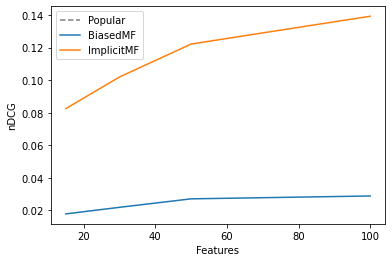

In [39]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'features'])['ndcg'].mean().reset_index()
pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['features'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('Features')
plt.ylabel('nDCG')

Text(0, 0.5, 'Precision')

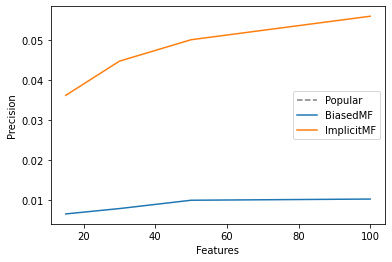

In [40]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'features'])['precision'].mean().reset_index()
pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['precision'].mean()
plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['features'], data['precision'], label=algo)
plt.legend()
plt.xlabel('Features')
plt.ylabel('Precision')